<a href="https://colab.research.google.com/github/OSegun/Zummit-Africa-ML-AL-Projects/blob/main/ZA01_RegressionModels_HousePricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Model For Housing Dataset

The Dataset can be downloaded from kaggle website https://www.kaggle.com/datasets/yasserh/housing-prices-dataset?select=Housing.csv

The task is to provide a machine learning model with Linear Regression model to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc.

The dataset contains the following features:
- Price - Price of the houses (Target Feature).
- Area - Area of the house.
- Bedrooms - Number of bedrooms in the house.
- bathrooms - Number of bathrooms in the house.
- Stories - Number of House Stories.
- Mainroad - Road network to the house.
- Guestroom - The availability of guestroom in the house.
- Basement - The availability of basement in the house.
- HotWaterHeating - The availability of hot water heater in the house.
- Air Conditioning - The availability of air conditioning in the house.
- Parking - The availability of parking in the house.
- Prefarea - The availability of prefarea in the house.
- Furnishingstatus - The availability of furnish, semifurnish, no furnish

In [ ]:
#import necessary libaries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score 
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
house_df = pd.read_csv('/content/Housing.csv') # reading the dataset to pandas
house_df.head() # Display the first few roles of the dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
house_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
house_df.shape # Number of Observation & Features

(545, 13)

In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
house_df.isna().sum() # Checking for missing values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
pd.set_option('display.max_rows', None)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

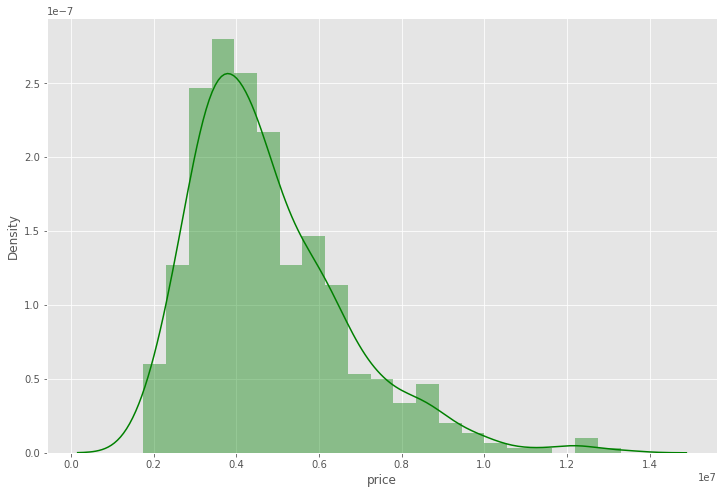

In [ ]:
sns.distplot(house_df['price'],color='green')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='new_price', ylabel='Density'>

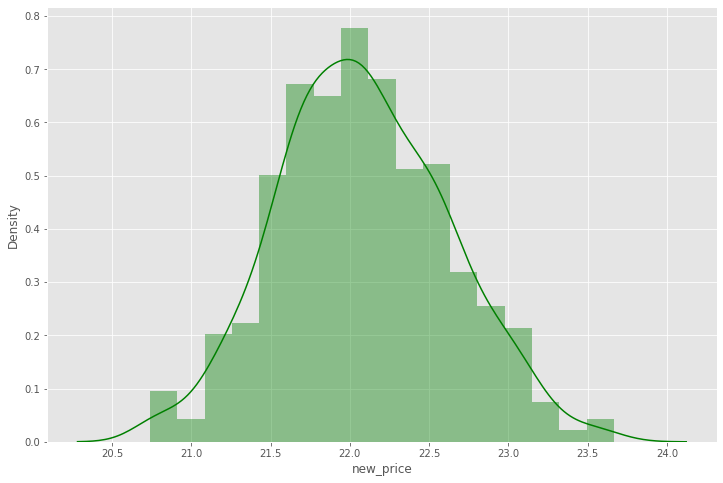

In [ ]:
#From the distribution plot there are noticeable biases because the target column is right skewed and can be corrected with the log transformation.
house_df['new_price'] = np.log2(house_df["price"])

sns.distplot(house_df['new_price'],color='green')

Text(0.5, 1.0, 'Correlation Matrix For Numeric Features')

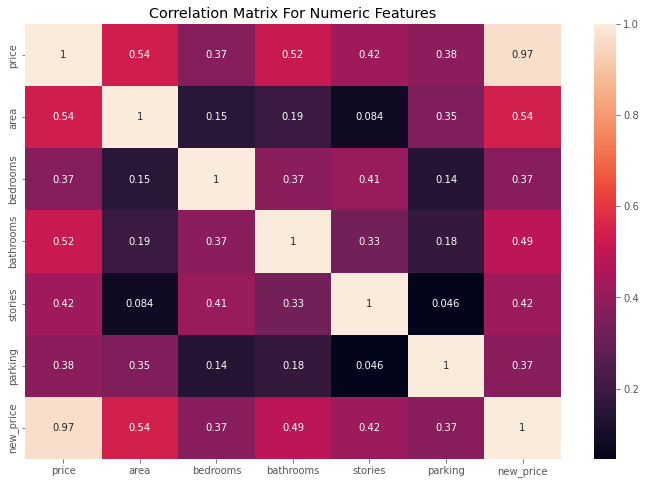

In [ ]:
correlation_matrix = house_df.corr()
# Ploting the correlation of the features to one another
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix For Numeric Features')

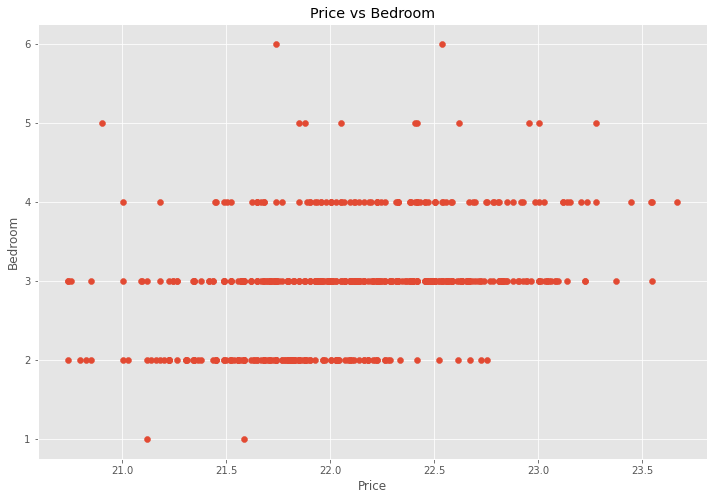

In [ ]:
plt.scatter(x= house_df['new_price'], y=house_df['bedrooms'])
plt.title('Price vs Bedroom')
plt.xlabel('Price')
plt.ylabel('Bedroom')
plt.show()

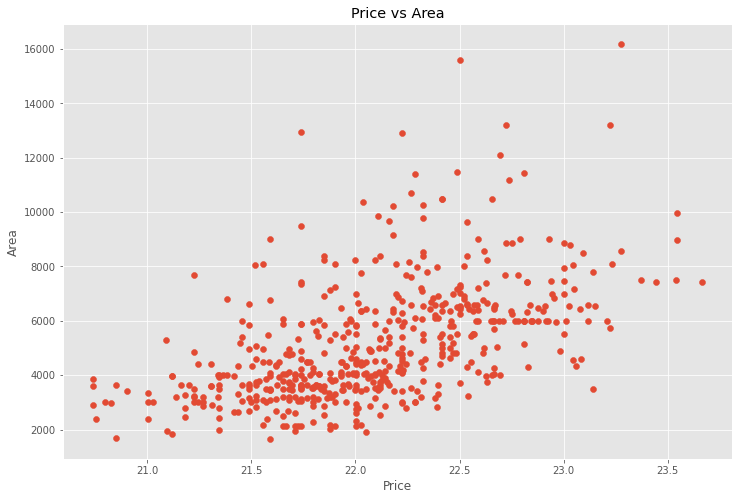

In [ ]:
plt.scatter(x= house_df['new_price'], y=house_df['area'])
plt.title('Price vs Area')
plt.xlabel('Price')
plt.ylabel('Area')
plt.show()

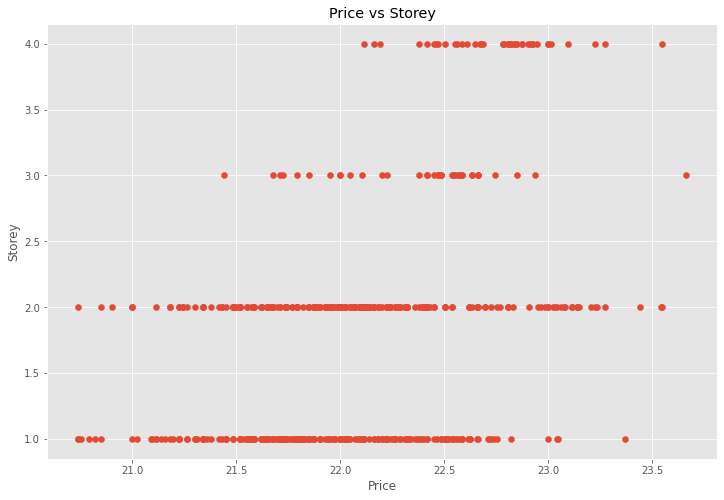

In [ ]:
plt.scatter(x= house_df['new_price'], y=house_df['stories'])
plt.title('Price vs Storey')
plt.xlabel('Price')
plt.ylabel('Storey')
plt.show()

In [ ]:
predictor = correlation_matrix['new_price'].sort_values(ascending=False)[1:5].index

predictor # The top four features that are highly correlated with the price of the houses

Index(['price', 'area', 'bathrooms', 'stories'], dtype='object')

In [ ]:
house_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'new_price'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
house_df['mainroad'] = encoder.fit_transform(house_df['mainroad'])
house_df['guestroom'] = encoder.fit_transform(house_df['guestroom'])
house_df['basement'] = encoder.fit_transform(house_df['basement'])
house_df['hotwaterheating'] = encoder.fit_transform(house_df['hotwaterheating'])
house_df['airconditioning'] = encoder.fit_transform(house_df['airconditioning'])
house_df['furnishingstatus'] = encoder.fit_transform(house_df['furnishingstatus'])
house_df['prefarea'] = encoder.fit_transform(house_df['prefarea'])

In [ ]:
correlation_matrix = house_df.corr()
predictor = correlation_matrix['new_price'].sort_values(ascending=False)

predictor # The top four features that are highly correlated with the price of the houses

new_price           1.000000
price               0.969010
area                0.543233
bathrooms           0.485715
airconditioning     0.455159
stories             0.415281
parking             0.371638
bedrooms            0.369986
prefarea            0.340557
mainroad            0.330041
guestroom           0.277047
basement            0.218401
hotwaterheating     0.088968
furnishingstatus   -0.338646
Name: new_price, dtype: float64

In [ ]:
house_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,new_price
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,23.664923
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,23.546278
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,23.546278
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,23.542151
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,23.443795


In [147]:
from sklearn.preprocessing import StandardScaler
# Spliting the dataset into input and ouput or features and target
X = house_df[['area', 'bathrooms', 'bedrooms', 'parking', 'stories', 'airconditioning', 'furnishingstatus', 'prefarea', 'mainroad']] # features
Y = house_df['new_price'] # Target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12)
# Standardizing the datasets to rescale the features to have a mean and varience of 0 and 1 respectively
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_train) 
scaled_XX = scaler.transform(X_test)

In [163]:
from sklearn.preprocessing import StandardScaler
# Spliting the dataset into input and ouput or features and target
X = np.asarray(house_df.drop(['price', 'new_price'], axis=1)) # features
Y = np.asarray(house_df['new_price']) # Target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12)
# Standardizing the datasets to rescale the features to have a mean and varience of 0 and 1 respectively
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_train) 
scaled_XX = scaler.transform(X_test)

In [164]:
print(X)
print(Y)

[[7420    4    2 ...    2    1    0]
 [8960    4    4 ...    3    0    0]
 [9960    3    2 ...    2    1    1]
 ...
 [3620    2    1 ...    0    0    2]
 [2910    3    1 ...    0    0    0]
 [3850    3    1 ...    0    0    2]]
[23.66492291 23.54627841 23.54627841 23.54215053 23.44379546 23.37119171
 23.27497639 23.27497639 23.23461865 23.22435032 23.22435032 23.20672465
 23.15034974 23.13946142 23.13946142 23.11743511 23.11743511 23.0950673
 23.08375199 23.07806088 23.06085159 23.04926361 23.04343453 23.04343453
 23.03170524 23.02580464 23.01273774 23.0019579  23.0019579  23.0019579
 23.0019579  23.0019579  22.98381055 22.96543202 22.9530483  22.94609169
 22.93930229 22.92795732 22.92479004 22.91524626 22.90884849 22.90242222
 22.87642702 22.87642702 22.8499548  22.8499548  22.84326015 22.83653429
 22.82977692 22.82298776 22.82298776 22.82298776 22.80931282 22.80931282
 22.80931282 22.80931282 22.80793817 22.78855426 22.78156783 22.78156783
 22.76749264 22.75327878 22.75327878 22.7461

In [165]:
model = LinearRegression() # Instanstiating the linear regression model for use
model.fit(scaled_X, Y_train)

LinearRegression()

In [166]:
X_train_prediction = model.predict(scaled_X)
error_score = metrics.r2_score(Y_train, X_train_prediction)
print('R square error : ', error_score)

R square error :  0.6690981196923143


In [167]:
X_test_prediction = model.predict(scaled_XX)
error_score1 = metrics.r2_score(Y_test, X_test_prediction)
print('R square error : ', error_score1)

R square error :  0.7362712730653069


In [168]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(scaled_X, Y_train) 

RandomForestRegressor()

In [169]:
from sklearn.metrics import mean_absolute_error
pred = forest_model.predict(scaled_X)
mean_absolute_error(Y_train, pred)

0.09417831084283114

In [170]:
forest_model.score(scaled_X, Y_train)

0.941275928976809

In [171]:
pred = forest_model.predict(scaled_XX)
mean_absolute_error(Y_test, pred)

0.26352541714202476

In [172]:
forest_model.score(scaled_XX, Y_test)

0.6766053093376635

In [173]:
from xgboost import XGBRegressor
X_model = XGBRegressor()

In [174]:
X_model.fit(scaled_X, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [175]:
X_train_prediction = X_model.predict(scaled_X)
score1 = metrics.r2_score(Y_train, X_train_prediction)

score2 = metrics.mean_absolute_error(Y_train, X_train_prediction)

print('R square error : ', score1)
print('Mean Absolute error : ', score2)

R square error :  0.992160003966278
Mean Absolute error :  0.028737723098458737


In [176]:
X_test_prediction = X_model.predict(scaled_XX)
score3 = metrics.r2_score(Y_test, X_test_prediction)

score4 = metrics.mean_absolute_error(Y_test, X_test_prediction)

print('R square error : ', score3)
print('Mean Absolute error : ', score4)

R square error :  0.6312560349136354
Mean Absolute error :  0.26543559848124343


In [177]:
#now using ridge instead of normal linear regression 
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=5)
ridge.fit(scaled_X, Y_train)

Ridge(alpha=5)

In [178]:
training_ridge = ridge.score(scaled_X, Y_train)
print("training accuracy with ridge ",training_ridge )

training accuracy with ridge  0.6690749617414915


In [179]:
test_ridge = ridge.score(scaled_XX, Y_test)
print("training accuracy with ridge ",test_ridge )

training accuracy with ridge  0.7354295478974433


## Conclusion

In the bid to get build a model that can produce the best accuracy, I tried out other regressor models with the housing dataset.

The Linear and Ridge Regressors were able to provide us good test accuracies of 73.6% while other regressors such as Random Forest Regressor and XGBRegressor provided a training accuracies of 99% but a lower test accuracies of 66% which shows an overfitting in the models.
